# Actualizar versión Numpy

In [ ]:
!pip install numpy==1.16.2
import numpy as np
print(np.__version__)

1.16.2


# Clonar repositorio con imágenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/advanced_lane_detection_3' /content/

In [ ]:
!unzip /content/rgb_3_mapa_3 -d /content/mapa_3/

Archive:  /content/rgb_3_mapa_3.zip
  inflating: /content/mapa_3/rgb_3/00002192.png  
  inflating: /content/mapa_3/rgb_3/00002196.png  
  inflating: /content/mapa_3/rgb_3/00002197.png  
  inflating: /content/mapa_3/rgb_3/00002211.png  
  inflating: /content/mapa_3/rgb_3/00002212.png  
  inflating: /content/mapa_3/rgb_3/00002217.png  
  inflating: /content/mapa_3/rgb_3/00002224.png  
  inflating: /content/mapa_3/rgb_3/00002231.png  
  inflating: /content/mapa_3/rgb_3/00002244.png  
  inflating: /content/mapa_3/rgb_3/00002245.png  
  inflating: /content/mapa_3/rgb_3/00002251.png  
  inflating: /content/mapa_3/rgb_3/00002258.png  
  inflating: /content/mapa_3/rgb_3/00002265.png  
  inflating: /content/mapa_3/rgb_3/00002279.png  
  inflating: /content/mapa_3/rgb_3/00002280.png  
  inflating: /content/mapa_3/rgb_3/00002294.png  
  inflating: /content/mapa_3/rgb_3/00002295.png  
  inflating: /content/mapa_3/rgb_3/00002301.png  
  inflating: /content/mapa_3/rgb_3/00002316.png  
  inflating: /

In [ ]:
input_dir = '/content/advanced_lane_detection_1'

Generar directorios de salida

In [ ]:
# Setting output folder
!mkdir /content/output_3
!mkdir /content/output_3/detections_images
!mkdir /content/output_3/detections_txt

In [ ]:
output_dir = '/content/output_3/'

# Clonar repositorio con Modelo Neuronal (YOLOv3)

In [ ]:
# Clone the entire repo.
!git clone https://gitlab.com/victorvirgilio/yolov3-model.git
%cd yolov3-model
!ls

Cloning into 'yolov3-model'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 41 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.
/content/yolov3-model
detector  yolov3.h5


In [ ]:
%cd /content/

In [ ]:
%cd yolov3-model

/content/yolov3-model


In [ ]:
pip uninstall tensorflow

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0


In [ ]:
pip install tensorflow==1.6.0

     |████████████████████████████████| 45.9MB 72kB/s 
     |████████████████████████████████| 3.1MB 47.1MB/s 
     |████████████████████████████████| 890kB 47.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=dda07254c6ba9145e85600caf135e71a7fcba9e87b43f657695c1ec4114a7820
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


In [ ]:
pip uninstall keras

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3


In [ ]:
pip install keras==2.1.5

     |████████████████████████████████| 337kB 16.2MB/s 


# Configurar Modelo Neuronal (YOLOv3)

In [ ]:
from detector.yolo import YOLO

import moviepy.editor as mpy
import time
import numpy as np

yolo = YOLO(model_path = 'yolov3.h5' , 
        anchors_path = 'detector/yolo_anchors.txt',
        classes_path = 'detector/coco_classes.txt',
        score = 0.8,
        iou = 0.7,
        model_image_size = (608, 608))

Using TensorFlow backend.


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3596288/45929032 bytes (7.8%)7831552/45929032 bytes (17.1%)12115968/45929032 bytes (26.4%)16416768/45929032 bytes (35.7%)20668416/45929032 bytes (45.0%)24952832/45929032 bytes (54.3%)29179904/45929032 bytes (63.5%)33333248/45929032 bytes (72.6%)37527552/45929032 bytes (81.7%)41820160/45929032 bytes (91.1%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1.
yolov3.h5 model, ancho

Realizar Inferencia


In [ ]:
import cv2
import os
import glob
from PIL import Image

def draw_boxes(img, boxes):
    for box in boxes:
        cv2.rectangle(img, box[0], box[1], (0,0,255), 2)
    return Image.fromarray(np.uint8(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

In [ ]:
# Cargar nombres
names = []
names = glob.glob('/content/advanced_lane_detection_3/*')
print(names)        

['/content/advanced_lane_detection_3/00003099.png', '/content/advanced_lane_detection_3/00002418.png', '/content/advanced_lane_detection_3/00004071.png', '/content/advanced_lane_detection_3/00003967.png', '/content/advanced_lane_detection_3/00002842.png', '/content/advanced_lane_detection_3/00003000.png', '/content/advanced_lane_detection_3/00003713.png', '/content/advanced_lane_detection_3/00002478.png', '/content/advanced_lane_detection_3/00003431.png', '/content/advanced_lane_detection_3/00003314.png', '/content/advanced_lane_detection_3/00004314.png', '/content/advanced_lane_detection_3/00004221.png', '/content/advanced_lane_detection_3/00002539.png', '/content/advanced_lane_detection_3/00003690.png', '/content/advanced_lane_detection_3/00003581.png', '/content/advanced_lane_detection_3/00002961.png', '/content/advanced_lane_detection_3/00003235.png', '/content/advanced_lane_detection_3/00004390.png', '/content/advanced_lane_detection_3/00004410.png', '/content/advanced_lane_detect

In [ ]:
import time
import glob
from keras.preprocessing import image

save = True
nivel = 'normal'
objects = ['Car', 'Van', 'Truck', 'Person','Bicycle','Motorbike','Bus']
dificultad = {'easy': [40, 0, 0.15], 'moderate': [25, 1, 0.30], 'hard': [25, 2, 0.50], 'normal': [0, 3, 1.00]}

# names = glob.glob(input_dir + '*.png')[:5]
print('Cantidad de imágenes:   {0}\n\n'.format(len(names)))

k = 0
yolov3_detections = {}
times = []
print('\n***** ***** ***** Inicio de la detección ***** ***** *****\n')
for filename in names:

    img = image.load_img(filename)
    # Get time
    start = time.time()
    dimg, out_boxes, out_scores, out_classes = yolo.detect_image(img)
    end = time.time()
    times.append(end - start)

    person = np.where(np.array(out_classes) == 0)[0]
    bicycle = np.where(np.array(out_classes) == 1)[0]
    car = np.where(np.array(out_classes) == 2)[0]
    motorbike = np.where(np.array(out_classes) == 3)[0]
    bus = np.where(np.array(out_classes) == 5)[0]
    truck = np.where(np.array(out_classes) == 7)[0]
    traffic_ligth = np.where(np.array(out_classes) == 9)[0]

    index_vehicles = np.concatenate((person, bicycle, car, motorbike, bus, truck,traffic_ligth), axis=0)

    final_detections = []
    for i in index_vehicles:
        top, left, bottom, right = out_boxes[i]
        class_detected = out_classes[i]
        top = max(0, np.floor(top + 0.5).astype('int32'))
        left = max(0, np.floor(left + 0.5).astype('int32'))
        bottom = min(img.size[1], np.floor(bottom + 0.5).astype('int32'))
        right = min(img.size[0], np.floor(right + 0.5).astype('int32'))
        box_height = bottom - top
        if(box_height >= dificultad[nivel][0]):
            final_detections.append(((left, top), (right, bottom)))

    yolov3_detections[filename] = final_detections

    if(save):
      from cv2 import imread
      car_img = draw_boxes(imread(filename), final_detections)
      car_img.save(output_dir + 'boxes_images_car/' + filename[-11:])
      dimg.save(output_dir + 'boxes_images_all/' + filename[-11:])
      # Generar detecciones (targets)
      f = open(output_dir + "boxes_txt/" + filename[-11:-4] + ".txt", "w")
      for object in final_detections:
        for x, y in object:
          f.write( str(x) + ',' + str(y) + ' ' )
        f.write( '\n' )
      f.close()

    if k%10==0:
        print('\n***** Imagen numero', k, 'fue procesada. *****')
    k+=1

print('\n\nDiccionario con las listas de detecciones por imagen obtenidas por YOLOV3: ')
# print(yolov3_detections)
f = open(output_dir + "/yolov3_detections.txt", "w")
f.write( str(yolov3_detections) )
f.close()
print('\n\t... diccionario guardado!')

tiempo_promedio = sum(times) / len(times)
print('\n\n\tPromedio de inferencia: {0}\n'.format(tiempo_promedio))

Cantidad de imágenes:   354



***** ***** ***** Inicio de la detección ***** ***** *****


***** Imagen numero 0 fue procesada. *****

***** Imagen numero 10 fue procesada. *****

***** Imagen numero 20 fue procesada. *****

***** Imagen numero 30 fue procesada. *****

***** Imagen numero 40 fue procesada. *****

***** Imagen numero 50 fue procesada. *****

***** Imagen numero 60 fue procesada. *****

***** Imagen numero 70 fue procesada. *****

***** Imagen numero 80 fue procesada. *****

***** Imagen numero 90 fue procesada. *****

***** Imagen numero 100 fue procesada. *****

***** Imagen numero 110 fue procesada. *****

***** Imagen numero 120 fue procesada. *****

***** Imagen numero 130 fue procesada. *****

***** Imagen numero 140 fue procesada. *****

***** Imagen numero 150 fue procesada. *****

***** Imagen numero 160 fue procesada. *****

***** Imagen numero 170 fue procesada. *****

***** Imagen numero 180 fue procesada. *****

***** Imagen numero 190 fue procesada. *****


In [ ]:
import time
import glob
from keras.preprocessing import image

save = True

# names = glob.glob(input_dir + '*.png')[:5]
print('Cantidad de imágenes:   {0}\n\n'.format(len(names)))

k = 0
yolov3_detections = {}
times = []
print('\n***** ***** ***** Inicio de la detección ***** ***** *****\n')
for filename in names:

    img = image.load_img(filename)
    # Get time
    start = time.time()
    dimg, out_boxes, out_scores, out_classes = yolo.detect_image(img)
    end = time.time()
    times.append(end - start)

    #print("Detecto " + str(len(out_scores)) + " objetos")
    f = open(output_dir + "detections_txt/" + filename[-11:-4] + ".txt", "w")
    for i in range(len(out_classes)):
      if out_classes[i] == 0:
        #print('Person' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
        f.write('Person' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
      elif out_classes[i] == 1 or out_classes[i] == 2 or out_classes[i] == 3 or out_classes[i] == 5 or out_classes[i] == 7:
        #print('Car' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
        f.write('Car' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
      elif out_classes[i] == 9:
        #print('Traffic Light' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
        f.write('Traffic Light' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
      else:
        #print('Other' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
        f.write('Other' + ',' + str(int(out_boxes[i][0])) + ',' + str(int(out_boxes[i][1])) + ',' + str(int(out_boxes[i][2])) + ',' + str(int(out_boxes[i][3])) + ',' + str(out_scores[i]))
      f.write('\n')
    f.close()


    ouput_name = filename.split('/')
    name = ouput_name[-1]
    dimg.save(output_dir + 'detections_images/' + name)
    print('\n***** Imagen numero', k, 'fue procesada. *****')
    k+=1


tiempo_promedio = sum(times) / len(times)
print('\n\n\tPromedio de inferencia: {0}\n'.format(tiempo_promedio))

Cantidad de imágenes:   282



***** ***** ***** Inicio de la detección ***** ***** *****


***** Imagen numero 0 fue procesada. *****

***** Imagen numero 1 fue procesada. *****

***** Imagen numero 2 fue procesada. *****

***** Imagen numero 3 fue procesada. *****

***** Imagen numero 4 fue procesada. *****

***** Imagen numero 5 fue procesada. *****

***** Imagen numero 6 fue procesada. *****

***** Imagen numero 7 fue procesada. *****

***** Imagen numero 8 fue procesada. *****

***** Imagen numero 9 fue procesada. *****

***** Imagen numero 10 fue procesada. *****

***** Imagen numero 11 fue procesada. *****

***** Imagen numero 12 fue procesada. *****

***** Imagen numero 13 fue procesada. *****

***** Imagen numero 14 fue procesada. *****

***** Imagen numero 15 fue procesada. *****

***** Imagen numero 16 fue procesada. *****

***** Imagen numero 17 fue procesada. *****

***** Imagen numero 18 fue procesada. *****

***** Imagen numero 19 fue procesada. *****

***** Imagen numer

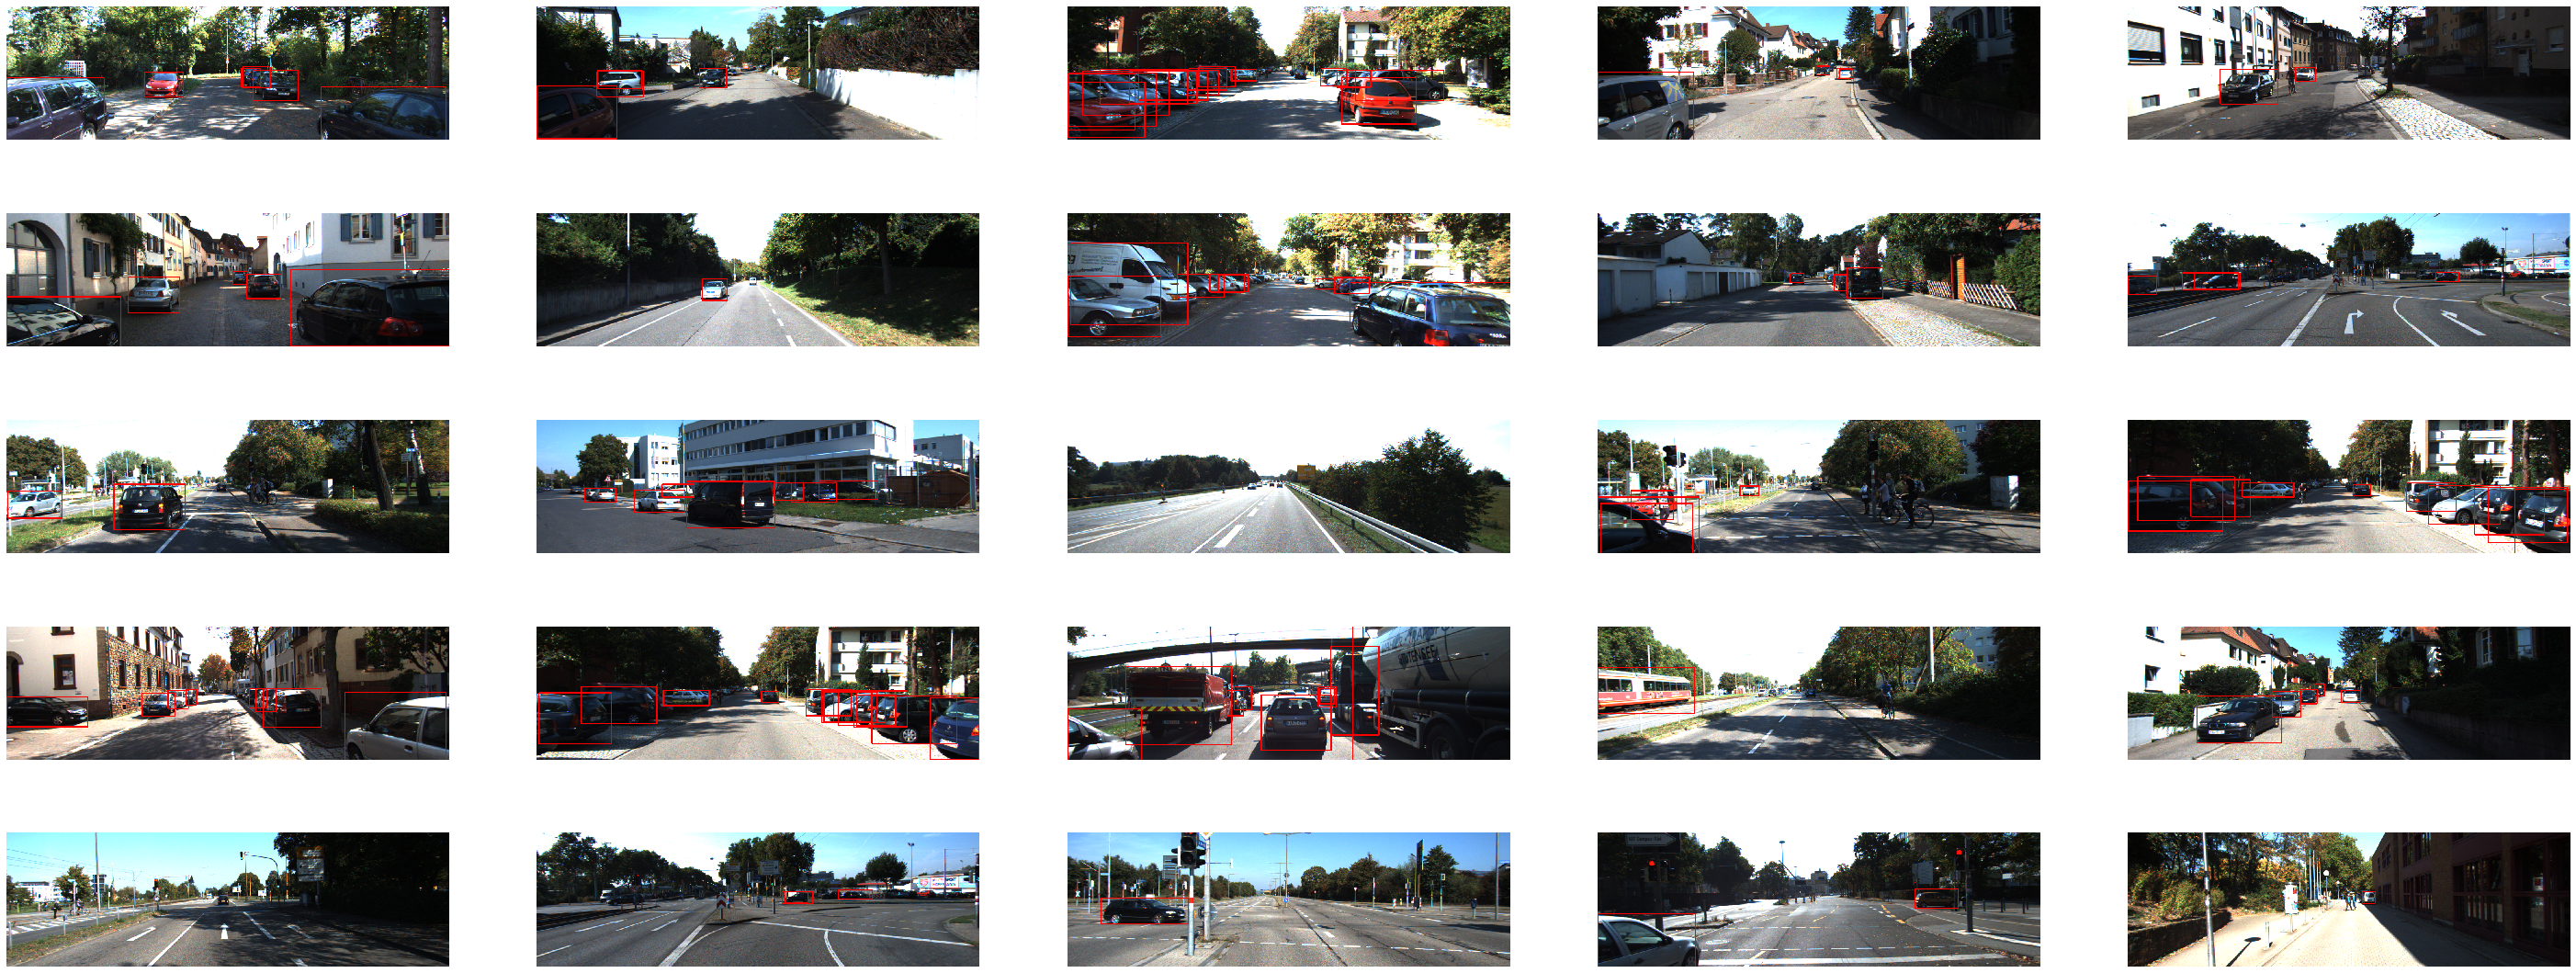

In [ ]:
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import random

 # Visualizacion para verificar
plt.figure(figsize=(50,20))
for i in range(25):
    filename = names[random.randint(0,len(names)-1)]
    img = imread(filename)
    boxes = yolov3_detections[filename]
    img = draw_boxes(img, boxes)
    plt.subplot(5,5,i+1)
    plt.imshow(img) 
    plt.axis('off') 
plt.show()

In [ ]:
import os

file_name = 'boxes_txt'

# Generate Compressed File (file.zip)
import zipfile
fantasy_zip = zipfile.ZipFile(output_dir[:-7] + file_name + '.zip', 'w') # Nombre del archivo comprimido
for folder, subfolders, files in os.walk(output_dir + file_name):
  for file in files:
    if file.endswith(''): # Extensión de los archivos a comprimir
      fantasy_zip.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), output_dir + file_name), compress_type = zipfile.ZIP_DEFLATED)
fantasy_zip.close()
print('Compressed File generated (' + file_name + '.zip)!')

Compressed File generated (boxes_txt.zip)!


In [ ]:
!cp -r /content/output_3/ '/content/drive/MyDrive/'

In [ ]:
!rm -r /content/output/

In [ ]:
!zip -r /content/file2.zip /content/output_2/

  adding: content/output/ (stored 0%)
  adding: content/output/detections_images/ (stored 0%)
  adding: content/output/detections_images/00006183.png (deflated 0%)
  adding: content/output/detections_images/00007401.png (deflated 0%)
  adding: content/output/detections_images/00005582.png (deflated 0%)
  adding: content/output/detections_images/00006863.png (deflated 0%)
  adding: content/output/detections_images/00007189.png (deflated 0%)
  adding: content/output/detections_images/00007735.png (deflated 0%)
  adding: content/output/detections_images/00007976.png (deflated 0%)
  adding: content/output/detections_images/00007160.png (deflated 0%)
  adding: content/output/detections_images/00006663.png (deflated 0%)
  adding: content/output/detections_images/00006971.png (deflated 0%)
  adding: content/output/detections_images/00007513.png (deflated 0%)
  adding: content/output/detections_images/00006545.png (deflated 0%)
  adding: content/output/detections_images/00005805.png (deflated 